# Other Cluster Methods Drill #

## By: Lorenz Madarang ##

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Three Blob Configurations ##
To demonstrate the differences between cluster methods I created three blob configurations.  The first blob I created has 5 blobs.  The second blob I created has 5 blobs also but they are closer together.  The last blob I created has 5 blobs but they are farther apart.  Then for each configuration I perform a K-means cluster, a spectral cluster, and then an affinity progration cluster. 

## 5 Blob Configuration ##

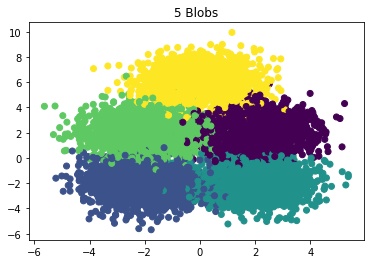

In [5]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs, this has five blobs
centers1 = [[2, 2], [-2, -2], [2, -2], [-2,2], [0,6]]

# Make 10,000 rows worth of data with two features representing five
# clusters, each having a standard deviation of 1.
X1, y1 = make_blobs(
    n_samples=10000,
    centers=centers1,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X1[:, 0], X1[:, 1], c=y1)
plt.title('5 Blobs')
plt.show()

#Divide into training and test sets.
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1,
    y1,
    test_size=0.9,
    random_state=42)

## 5 Blobs Closer Together ##

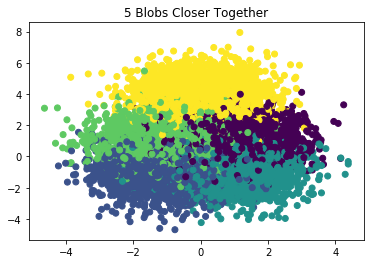

In [7]:
# The coordinates of the centers of our blobs, this has five blobs but closer together
centers2 = [[1, 1], [-1, -1], [1, -1], [-1,1], [0,4]]

# Make 10,000 rows worth of data with two features representing five
# clusters, each having a standard deviation of 1.
X2, y2 = make_blobs(
    n_samples=10000,
    centers=centers2,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X2[:, 0], X2[:, 1], c=y2)
plt.title('5 Blobs Closer Together')
plt.show()

#Divide into training and test sets.
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2,
    y2,
    test_size=0.9,
    random_state=42)

## 5 Blobs Farther Apart ##

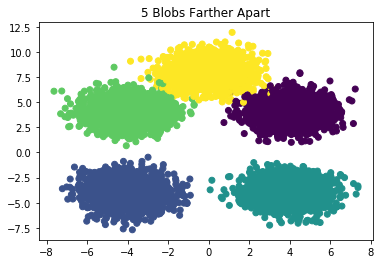

In [8]:
# The coordinates of the centers of our blobs, this has five blobs but farther apart
centers3 = [[4, 4], [-4, -4], [4, -4], [-4,4], [0,8]]

# Make 10,000 rows worth of data with two features representing five
# clusters, each having a standard deviation of 1.
X3, y3 = make_blobs(
    n_samples=10000,
    centers=centers3,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X3[:, 0], X3[:, 1], c=y3)
plt.title('5 Blobs Farther Apart')
plt.show()

#Divide into training and test sets.
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3,
    y3,
    test_size=0.9,
    random_state=42)

## Clustering on First 5-Blob Configuration ##
In the K-means cluster it was able to correctly estimate the number of clusters.  It looks like it was able to come pretty close in identifying the clusters of data.  For the spectral cluster, it did not perform as well as the K-means cluster there are some mislabelling of the dark-blue clusters as there are some dark-blue points around some of the other clusters.  As expected, the Affinity Propagation cluster over-estimated the number of clusters, it estimated 24 clusters almost 5 times the number of actual clusters. 

In [22]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train1, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train1)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 5


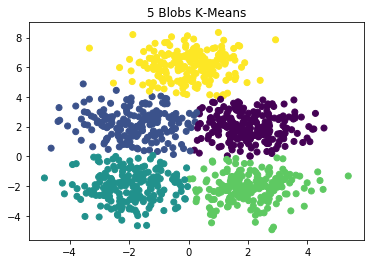

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0      207    9    0    2    3
1        0    4  194    5    0
2        2    1    7  181    0
3        5  176    4    0    2
4        4    1    0    0  193


In [25]:
plt.scatter(X_train1[:, 0], X_train1[:, 1], c=labels)
plt.title('5 Blobs K-Means')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train1,labels))

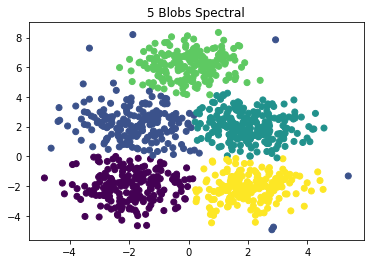

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        0   10  210    0    1
1      194    5    0    0    4
2        8    4    2    0  177
3        4  176    6    1    0
4        0    5    5  188    0


In [26]:
from sklearn.cluster import SpectralClustering

# We know we're looking for five clusters.
n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train1)

#Predicted clusters.
predict1=sc.fit_predict(X_train1)

#Graph results.
plt.scatter(X_train1[:, 0], X_train1[:, 1], c=predict1)
plt.title('5 Blobs Spectral')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train1,predict1))

In [15]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train1)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 24


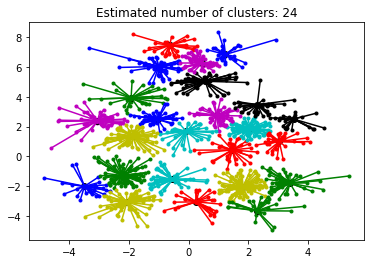

In [16]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train1[cluster_centers_indices[k]]
    plt.plot(X_train1[class_members, 0], X_train1[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train1[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

## Clustering on Second 5-Blob Configuration ##
In the K-means cluster it was unable to correctly estimate the number of clusters.  It estimated two clusters when there was actually five clusters.  For the spectral cluster, it was able to correctly identify the clusters.  But it was able to correctly identify the clusters because we had the expected number of clusters. As expected, the Affinity Propagation cluster over-estimated the number of clusters, it estimated 35 clusters almost 7 times the number of actual clusters.  I thought that the number of estimated clusters by the Affinity Propagation would be less since the clusters were closer together, but it actually produced more clusters.

In [34]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train2, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train2)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 2


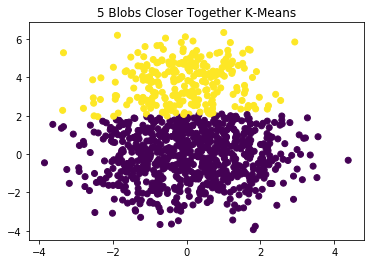

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      194   27
1      203    0
2      191    0
3      153   34
4        6  192


In [35]:
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=labels)
plt.title('5 Blobs Closer Together K-Means')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train2,labels))

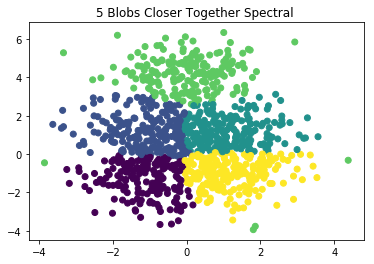

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        3   29  157    3   29
1      135   32    4    1   31
2       24    5   12    3  147
3       17  124   34    7    5
4        0   12    9  177    0


In [36]:
# We know we're looking for five clusters.
n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train2)

#Predicted clusters.
predict2=sc.fit_predict(X_train2)

#Graph results.
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=predict2)
plt.title('5 Blobs Closer Together Spectral ')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train2,predict2))

In [31]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train2)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 35


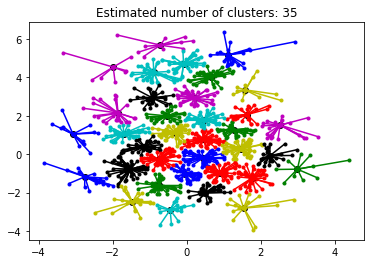

In [32]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train2[cluster_centers_indices[k]]
    plt.plot(X_train2[class_members, 0], X_train2[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train2[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

## Clustering on Third 5-Blob Configuration ##
In the K-means cluster it was unable to correctly estimate the number of clusters.  It estimated four clusters when there was actually five clusters.  For the spectral cluster, it was able to identify the clusters marginally.  It was able to identify the central blobs of the five clusters but there are instances of light-green data points surrounding the other clusters.  It doesn't make sense.  As expected, the Affinity Propagation cluster over-estimated the number of clusters, it estimated 59 clusters almost 12 times the number of actual clusters.  The number of clusters aligned with my prediction.  I predicted that the farther the clusters the larger the number of estimated clusters by the affinity propagation.  

In [38]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train3, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train3)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 4


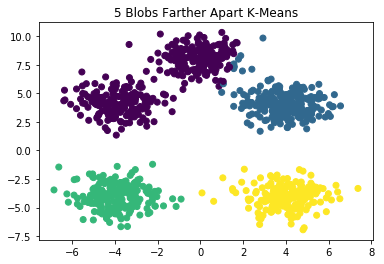

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        1  220    0    0
1        0    0  203    0
2        0    0    0  191
3      187    0    0    0
4      187   11    0    0


In [40]:
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=labels)
plt.title('5 Blobs Farther Apart K-Means')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train3,labels))

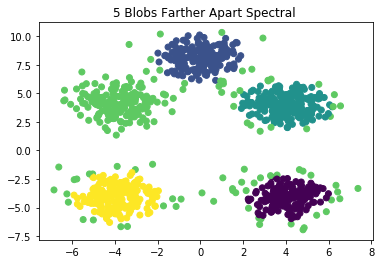

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        0    0  205   16    0
1        0    0    0   19  184
2      161    0    0   30    0
3        0    0    0  187    0
4        0  183    0   15    0


In [41]:
# We know we're looking for five clusters.
n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train3)

#Predicted clusters.
predict3=sc.fit_predict(X_train3)

#Graph results.
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=predict3)
plt.title('5 Blobs Farther Apart Spectral ')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train3,predict3))

In [42]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train3)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 59


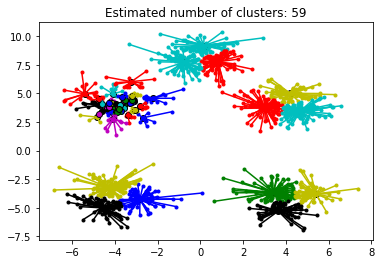

In [43]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train3[cluster_centers_indices[k]]
    plt.plot(X_train3[class_members, 0], X_train3[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train3[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()